FLIGHT PRICE PREDICTION

In [393]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import warnings
warnings.filterwarnings('ignore')

In [394]:
flight_price=pd.read_csv('flight_price_prediction.csv',sep='\t')
flight_price

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [395]:
df=pd.DataFrame(flight_price)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


GATHERING BASIC INFORMATION ABOUT THE DATASET LIKE NULL VALUES,DATA TYPES ETC

In [396]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [397]:
df=df.dropna()
df.shape

(10682, 11)

In [398]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [399]:
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [400]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

CHANGING THE DATA TYPES OF THE COLUMNS CONTAINING DATES OR TIME TO DATETIME FORMAT

CONVERTING THE 'Date_of_Journey' COLUMN TO DATE TIME FORMAT AND THEN EXTRACTING THE DAY AND THE HOURS SEPARATELY.


In [401]:
import datetime
df['day_of_Journey']=pd.to_datetime(df['Date_of_Journey']).dt.day
df['month_of_Journey']=pd.to_datetime(df['Date_of_Journey']).dt.month


In [402]:
df['Dep_hour'] = pd.to_datetime(df['Dep_Time'], format='%H:%M').dt.hour
df['Dep_min'] = pd.to_datetime(df['Dep_Time'], format='%H:%M').dt.minute

EXTRACTING THE MINUTES AND HOURS SEPARATELY FROM THE DEPARTURE AND ARRIVAL TIME FEATURES

In [403]:
df['arrival_hour']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['arrival_min']=pd.to_datetime(df['Date_of_Journey']).dt.minute



In [404]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_Journey,month_of_Journey,Dep_hour,Dep_min,arrival_hour,arrival_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,5,50,13,0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25,4,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,18,5,23,0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,16,50,21,0


EXTRACTING THE HOURS AND MINUTES FROM THE 'DURATION' FEATURE SEPARATELY

In [405]:
hrs_min=[]
for i in df['Duration']:
    if(len(i)<=3):
        hrs_min.append(i)
        hrs_min.append("00m")
    else:
        hrs_min.extend(i.split(' '))
len(hrs_min)
    

21364

In [406]:
hrs_min

['2h',
 '50m',
 '7h',
 '25m',
 '19h',
 '00m',
 '5h',
 '25m',
 '4h',
 '45m',
 '2h',
 '25m',
 '15h',
 '30m',
 '21h',
 '5m',
 '25h',
 '30m',
 '7h',
 '50m',
 '13h',
 '15m',
 '2h',
 '35m',
 '2h',
 '15m',
 '12h',
 '10m',
 '2h',
 '35m',
 '26h',
 '35m',
 '4h',
 '30m',
 '22h',
 '35m',
 '23h',
 '00m',
 '20h',
 '35m',
 '5h',
 '10m',
 '15h',
 '20m',
 '2h',
 '50m',
 '2h',
 '55m',
 '13h',
 '20m',
 '15h',
 '10m',
 '5h',
 '45m',
 '5h',
 '55m',
 '2h',
 '50m',
 '2h',
 '15m',
 '2h',
 '15m',
 '13h',
 '25m',
 '2h',
 '50m',
 '22h',
 '00m',
 '5h',
 '30m',
 '10h',
 '25m',
 '5h',
 '15m',
 '2h',
 '30m',
 '6h',
 '15m',
 '11h',
 '55m',
 '11h',
 '5m',
 '8h',
 '30m',
 '22h',
 '5m',
 '2h',
 '45m',
 '12h',
 '00m',
 '2h',
 '50m',
 '2h',
 '50m',
 '2h',
 '15m',
 '16h',
 '5m',
 '19h',
 '55m',
 '3h',
 '15m',
 '25h',
 '20m',
 '2h',
 '50m',
 '3h',
 '00m',
 '2h',
 '50m',
 '16h',
 '15m',
 '15h',
 '5m',
 '2h',
 '15m',
 '6h',
 '30m',
 '25h',
 '5m',
 '12h',
 '25m',
 '27h',
 '20m',
 '10h',
 '15m',
 '10h',
 '30m',
 '2h',
 '15m',
 

In [407]:
hours=[]
mins_=[]
for i in range(0,len(hrs_min),2):
    hours.append(hrs_min[i])
    
for i in range(1,len(hrs_min),2):
    mins_.append(hrs_min[i])
print(len(hours))
print(len(mins_))

10682
10682


In [408]:
#removing the string datatype('h' and 'm') from the data
hrs=[]
mins=[]
for i in hours:
    hrs.append(i[:-1])
for j in mins_:
    mins.append(j[:-1])
print(len(hrs))
print(len(mins))

10682
10682


In [409]:
# adding columns duration_hour and duration_minute  to the DataFrame
df['duration_hour']=hrs
df['duration_mins']=mins
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_Journey,month_of_Journey,Dep_hour,Dep_min,arrival_hour,arrival_min,duration_hour,duration_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,0,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,5,50,13,0,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25,4,0,19,00
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,18,5,23,0,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,16,50,21,0,4,45


DROPPING ALL THE PARENT COLUMNS THAT WERE USED FOR EXTRACTION

In [410]:
list=['Date_of_Journey','Dep_Time','Arrival_Time','Duration']
for i in list:
    df.drop(i,axis=1,inplace=True)

In [411]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,day_of_Journey,month_of_Journey,Dep_hour,Dep_min,arrival_hour,arrival_min,duration_hour,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,0,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,0,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,0,19,00
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,0,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,0,4,45


FINDING OUT THE CARDINALITY OF THE CATEGORICAL FEATURES

In [412]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

SINCE ALMOST 80% DATA IS NO INFO(EQUIVALENT TO NULL), DROPPING THIS COLUMN 

In [413]:
df.drop('Additional_Info',axis=1,inplace=True)

In [414]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

USING LABEL ENCODER TO ENCODE THIS FEATURE

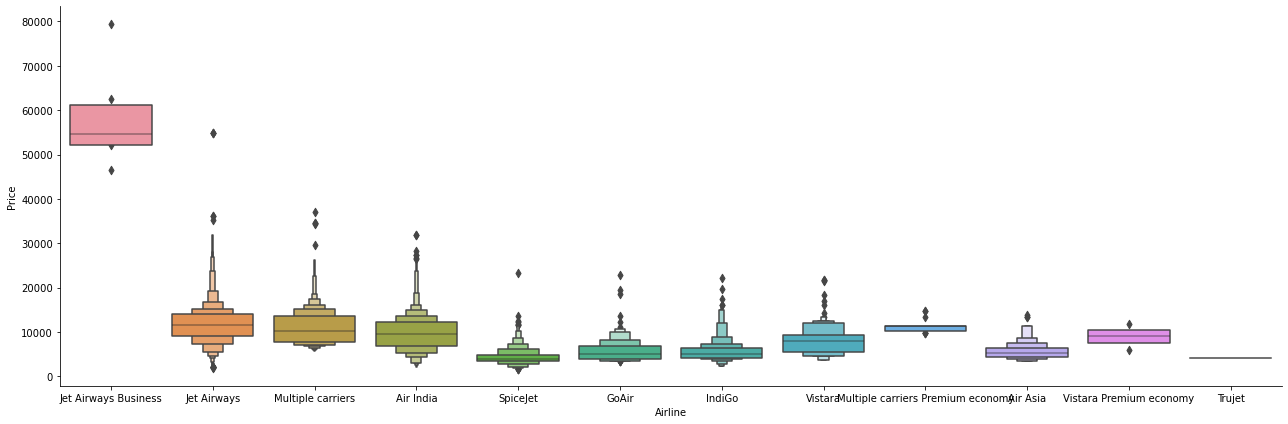

In [415]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()


In [416]:
airline=df['Airline']
airline=pd.get_dummies(airline,drop_first=True)
airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


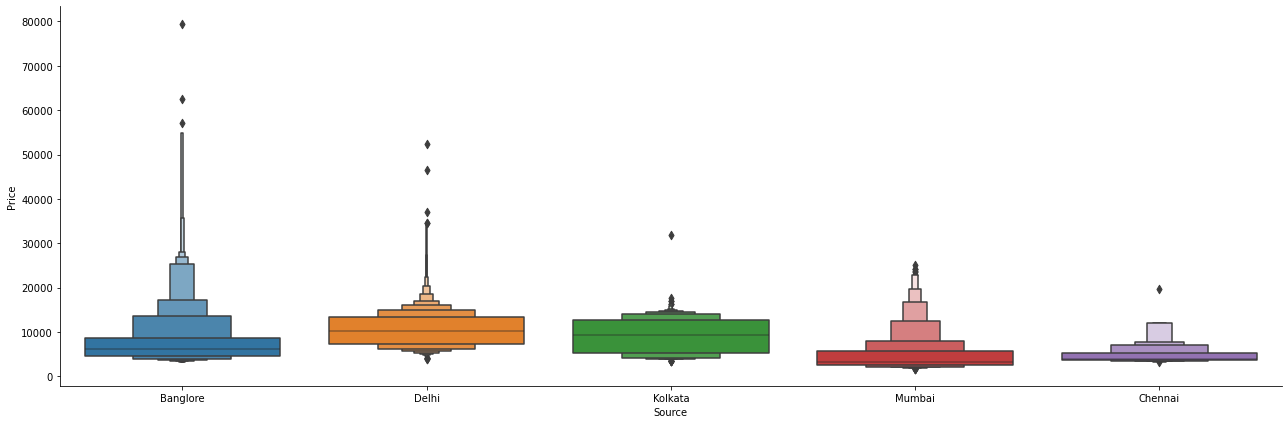

In [417]:
#comparing the source with price
sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()


In [418]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = df[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [419]:
#One hot encoding destination
Destination = df["Destination"]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [420]:
df['Route'].nunique()

128

DROPPING THE ROUTE COLUMN AS THE TOTAL STOPS AND THE ROUTE ARE MORE OR LESS PROVIDING SIMILAR INFORMATION

In [421]:
df.drop('Route',axis=1,inplace=True)

In [422]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,day_of_Journey,month_of_Journey,Dep_hour,Dep_min,arrival_hour,arrival_min,duration_hour,duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,0,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,5,1,5,50,13,0,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,6,9,9,25,4,0,19,00
3,IndiGo,Kolkata,Banglore,1 stop,6218,5,12,18,5,23,0,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,3,1,16,50,21,0,4,45


USING LABEL ENCODER FOR THE ROUTE AND THE NUMBER OF STOPS COLUMNS

In [423]:
from sklearn.preprocessing import LabelEncoder

In [424]:
le= LabelEncoder()
df['Total_Stops']=le.fit_transform(df['Total_Stops'])
df_test['Airline']=le.fit_transform(df_test['Airline'])

In [425]:
df_new=pd.concat([df,Source,Destination],axis=1)
df_new.head()

,Airline,Source,Destination,Total_Stops,Price,day_of_Journey,month_of_Journey,Dep_hour,Dep_min,arrival_hour,...,duration_mins,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,4,3897,24,3,22,20,1,...,50,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,1,7662,5,1,5,50,13,...,25,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1,13882,6,9,9,25,4,...,00,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,0,6218,5,12,18,5,23,...,25,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,0,13302,3,1,16,50,21,...,45,0,0,0,0,0,0,0,0,1


DROPPING THE FIRST THREE FEATURES AS WE ALREADY HAVE CREATED DUMMIES FOR THEM

In [426]:
df_new.drop('Airline',axis=1,inplace=True)
df_new.drop('Source',axis=1,inplace=True)
df_new.drop('Destination',axis=1,inplace=True)
df_new.head()

,Total_Stops,Price,day_of_Journey,month_of_Journey,Dep_hour,Dep_min,arrival_hour,arrival_min,duration_hour,duration_mins,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,4,3897,24,3,22,20,1,0,2,50,0,0,0,0,0,0,0,0,1
1,1,7662,5,1,5,50,13,0,7,25,0,0,1,0,0,0,0,0,0
2,1,13882,6,9,9,25,4,0,19,00,0,1,0,0,1,0,0,0,0
3,0,6218,5,12,18,5,23,0,5,25,0,0,1,0,0,0,0,0,0
4,0,13302,3,1,16,50,21,0,4,45,0,0,0,0,0,0,0,0,1


In [427]:
#separating the independent and dependant features from the training data
x=df_new.drop('Price',axis=1)
y=df_new['Price']

PROCEEDING TO WORKING ON THE TEST DATA

In [428]:
df_test_=pd.read_csv('flight_price_prediction(test).csv',sep='\t')
df_test=pd.DataFrame(df_test_)
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


performing the same operations that were performed on the training data

In [429]:
df_test.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [430]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


CHANGING THE DATA TYPES OF THE COLUMNS CONTAINING DATES OR TIME TO DATETIME FORMAT

CONVERTING THE 'Date_of_Journey' COLUMN TO DATE TIME FORMAT AND THEN EXTRACTING THE DAY AND THE MONTH SEPARATELY

In [431]:
import datetime
df_test['day_of_Journey']=pd.to_datetime(df_test['Date_of_Journey']).dt.day
df_test['month_of_Journey']=pd.to_datetime(df_test['Date_of_Journey']).dt.month


In [432]:
#EXTRACTING THE MINUTES AND HOURS SEPARATELY FROM THE DEPARTURE AND ARRIVAL TIME FEATURES

df_test['arrival_hour']=pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['arrival_min']=pd.to_datetime(df_test['Date_of_Journey']).dt.minute
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,day_of_Journey,month_of_Journey,arrival_hour,arrival_min
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,4,0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,5,12,10,0
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,0
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,21,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,2,0


In [433]:
df_test['Dep_hour'] = pd.to_datetime(df_test['Dep_Time'], format='%H:%M').dt.hour
df_test['Dep_min'] = pd.to_datetime(df_test['Dep_Time'], format='%H:%M').dt.minute

In [434]:
#EXTRACTING THE HOURS AND MINUTES FROM THE 'DURATION' FEATURE SEPARATELY

hrs_min=[]
for i in df_test['Duration']:
    if(len(i)<=3):
        hrs_min.append(i)
        hrs_min.append("00m")
    else:
        hrs_min.extend(i.split(' '))
len(hrs_min)

5342

In [435]:
hours=[]
mins_=[]
for i in range(0,len(hrs_min),2):
    hours.append(hrs_min[i])
    
for i in range(1,len(hrs_min),2):
    mins_.append(hrs_min[i])
print(len(hours))
print(len(mins_))

2671
2671


In [436]:
#removing the string datatype('h' and 'm') from the data
hrs=[]
mins=[]
for i in hours:
    hrs.append(i[:-1])
for j in mins_:
    mins.append(j[:-1])
print(len(hrs))
print(len(mins))

2671
2671


In [437]:
# adding columns duration_hour and duration_minute  to the DataFrame
df_test['duration_hour']=hrs
df_test['duration_mins']=mins
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,day_of_Journey,month_of_Journey,arrival_hour,arrival_min,Dep_hour,Dep_min,duration_hour,duration_mins
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,4,0,17,30,10,55
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,5,12,10,0,6,20,4,00
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,0,19,15,23,45
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,21,0,8,0,13,00
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,2,0,23,55,2,50


SINCE ALMOST 80% DATA IS NO INFO(EQUIVALENT TO NULL), DROPPING Additional_info COLUMN too

In [438]:
list=['Date_of_Journey','Dep_Time','Arrival_Time','Duration','Additional_Info']
for i in list:
    df_test.drop(i,axis=1,inplace=True)

In [439]:
df_test.head()

,Airline,Source,Destination,Route,Total_Stops,day_of_Journey,month_of_Journey,arrival_hour,arrival_min,Dep_hour,Dep_min,duration_hour,duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,6,6,4,0,17,30,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,5,12,10,0,6,20,4,00
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,21,5,19,0,19,15,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,21,5,21,0,8,0,13,00
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,24,6,2,0,23,55,2,50


In [440]:

# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = df_test[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)
#One hot encoding destination
Destination = df_test["Destination"]

Destination = pd.get_dummies(Destination, drop_first = True)



In [441]:
le= LabelEncoder()
df_test['Total_Stops']=le.fit_transform(df_test['Total_Stops'])
df_test['Route']=le.fit_transform(df_test['Route'])
df_test['Airline']=le.fit_transform(df_test['Airline'])

In [442]:
df_test_new=pd.concat([df_test,Source,Destination],axis=1)
df_test_new.head()

,Airline,Source,Destination,Route,Total_Stops,day_of_Journey,month_of_Journey,arrival_hour,arrival_min,Dep_hour,...,duration_mins,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,4,Delhi,Cochin,76,0,6,6,4,0,17,...,55,0,1,0,0,1,0,0,0,0
1,3,Kolkata,Banglore,65,0,5,12,10,0,6,...,00,0,0,1,0,0,0,0,0,0
2,4,Delhi,Cochin,76,0,21,5,19,0,19,...,45,0,1,0,0,1,0,0,0,0
3,6,Delhi,Cochin,76,0,21,5,21,0,8,...,00,0,1,0,0,1,0,0,0,0
4,0,Banglore,Delhi,16,4,24,6,2,0,23,...,50,0,0,0,0,0,1,0,0,0


In [443]:
#DROPPING THE FIRST THREE FEATURES AS WE ALREADY HAVE CREATED DUMMIES FOR THEM

df_test_new.drop('Airline',axis=1,inplace=True)
df_test_new.drop('Source',axis=1,inplace=True)
df_test_new.drop('Destination',axis=1,inplace=True)
df_test_new.head()


,Route,Total_Stops,day_of_Journey,month_of_Journey,arrival_hour,arrival_min,Dep_hour,Dep_min,duration_hour,duration_mins,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,76,0,6,6,4,0,17,30,10,55,0,1,0,0,1,0,0,0,0
1,65,0,5,12,10,0,6,20,4,00,0,0,1,0,0,0,0,0,0
2,76,0,21,5,19,0,19,15,23,45,0,1,0,0,1,0,0,0,0
3,76,0,21,5,21,0,8,0,13,00,0,1,0,0,1,0,0,0,0
4,16,4,24,6,2,0,23,55,2,50,0,0,0,0,0,1,0,0,0


PROCEEDING TO MODEL TRAINING AND TESTING PART

In [444]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [445]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [446]:
x_test.shape

(3526, 18)

LINEAR REGRESSION

In [447]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print("score:",lr.score(x_train,y_train))
print("mean squared error:",mean_squared_error(y_test,pred_lr))
print("mean absolute error:",mean_absolute_error(y_test,pred_lr))

score: 0.410051350556524
mean squared error: 10892671.873719435
mean absolute error: 2413.237176640989


RANDOM FOREST REGRESSOR

In [448]:
from sklearn.metrics import r2_score

In [449]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=50,random_state=42)
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
print("score : ",rfr.score(x_train,y_train))
print("mean_squared error: ",mean_squared_error(y_test,pred_rfr))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_rfr))
print("r2 score: ",r2_score(y_test,pred_rfr))

score :  0.9458462843551142
mean_squared error:  5922504.43318734
mean_absolute_error:  1415.8786811328996
r2 score:  0.7049589246288068


DECISION TREE REGRESSOR

In [450]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
print("score : ",dtr.score(x_train,y_train))
print("mean_squared error: ",mean_squared_error(y_test,pred_dtr))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_dtr))
print("r2 score: ",r2_score(y_test,pred_dtr))


score :  0.9678774276123212
mean_squared error:  8496407.13855431
mean_absolute_error:  1627.826342408773
r2 score:  0.5767349560933199


SCALING DATA

In [451]:
from sklearn.preprocessing import MinMaxScaler

In [452]:
target=df_new['Price'].copy()

In [453]:
mms= MinMaxScaler()
mms.fit(df_new)
mms_scale=mms.transform(df_new)


spca=pd.DataFrame(data=mms_scale,columns=df_new.columns)
spca

,Total_Stops,Price,day_of_Journey,month_of_Journey,Dep_hour,Dep_min,arrival_hour,arrival_min,duration_hour,duration_mins,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1.00,0.027497,0.875000,0.181818,0.956522,0.363636,0.043478,0.0,0.021739,0.909091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.25,0.075920,0.083333,0.000000,0.217391,0.909091,0.565217,0.0,0.130435,0.454545,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.25,0.155917,0.125000,0.727273,0.391304,0.454545,0.173913,0.0,0.391304,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.00,0.057348,0.083333,1.000000,0.782609,0.090909,1.000000,0.0,0.086957,0.454545,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00,0.148457,0.000000,0.000000,0.695652,0.909091,0.913043,0.0,0.065217,0.818182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,1.00,0.030198,0.041667,0.727273,0.826087,1.000000,0.956522,0.0,0.021739,0.545455,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10678,1.00,0.030687,1.000000,0.272727,0.869565,0.818182,1.000000,0.0,0.021739,0.636364,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10679,1.00,0.070351,1.000000,0.272727,0.347826,0.363636,0.478261,0.0,0.043478,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10680,1.00,0.140046,0.000000,0.000000,0.478261,0.545455,0.608696,0.0,0.021739,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [454]:
y2=spca['Price']
x2=spca.drop('Price',axis=1)



In [455]:
x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=.33,random_state=42)

In [456]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=2)
knr.fit(x_train,y_train)
pred_knr=knr.predict(x_test)

print("score : ",knr.score(x_train,y_train))
print("mean_squared error: ",mean_squared_error(y_test,pred_knr))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_knr))
print("r2 score: ",r2_score(y_test,pred_knr))

score :  0.8608280568131975
mean_squared error:  0.001484706154988086
mean_absolute_error:  0.024653069507838854
r2 score:  0.5528513682191155


SUPPORT VECTOR MACHINE

In [457]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [458]:
from sklearn.svm import SVR
list=['linear','poly','rbf']
for i in list:
    
    svr=SVR(kernel=i)
    svr.fit(x_train,y_train)
    pred_svr=svr.predict(x_test)
    print("score : ",svr.score(x_train,y_train))
    print("mean_squared error: ",mean_squared_error(y_test,pred_svr))
    print("mean_absolute_error: ",mean_absolute_error(y_test,pred_svr))
    print("r2 score: ",r2_score(y_test,pred_svr))

score :  0.3429629354352617
mean_squared error:  12267713.011983998
mean_absolute_error:  2403.336409684109
r2 score:  0.3888600202443365
score :  0.06427624841342305
mean_squared error:  18542278.53561189
mean_absolute_error:  3326.253083777934
r2 score:  0.0762803370271321
score :  0.004677189349931776
mean_squared error:  19803666.12138152
mean_absolute_error:  3499.76763181973
r2 score:  0.013441861520063991


ADABOOSTREGRESSOR

In [459]:
from sklearn.ensemble import AdaBoostRegressor
abc=AdaBoostRegressor(n_estimators=100)
abc.fit(x_train,y_train)
pred_abc=abc.predict(x_test)
print("score : ",abc.score(x_train,y_train))
print("mean_squared error: ",mean_squared_error(y_test,pred_abc))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_abc))
print("r2 score: ",r2_score(y_test,pred_abc))

score :  0.16829687307875008
mean_squared error:  19670347.277069367
mean_absolute_error:  3637.8440588059043
r2 score:  0.020083399004221403


CROSS VALIDATION

In [460]:
from sklearn.model_selection import cross_val_score

In [461]:
cv_1=cross_val_score(lr,x,y,cv=10)
print("mean score:",cv_1.mean())
print("cross val score:",cv_1)

mean score: 0.426584296000052
cross val score: [0.43714631 0.41075461 0.39564489 0.4828961  0.46842048 0.41151696
 0.42284314 0.41358132 0.45458941 0.36844973]


In [462]:
cv_1=cross_val_score(rfr,x,y,cv=10)
print("mean score:",cv_1.mean())
print("cross val score:",cv_1)

mean score: 0.7385778037831662
cross val score: [0.78058799 0.7361885  0.73687304 0.7309992  0.77391106 0.72975931
 0.77198407 0.77977897 0.71876834 0.62692756]


In [463]:
cv_1=cross_val_score(dtr,x,y,cv=10)
print("mean score:",cv_1.mean())
print("cross val score:",cv_1)

mean score: 0.5870468184576849
cross val score: [0.60373672 0.47507917 0.66864901 0.49610441 0.65796905 0.67574835
 0.59720272 0.66256634 0.63532166 0.39809075]


In [464]:
cv_1=cross_val_score(abc,x,y,cv=10)
print("mean score:",cv_1.mean())
print("cross val score:",cv_1)

mean score: 0.045751836324646813
cross val score: [-0.02189818  0.14433742  0.33405749 -0.12572773 -0.13628691  0.07807331
  0.1428158  -0.15708979 -0.06336725  0.26260422]


In [465]:
cv_1=cross_val_score(knr,x,y,cv=10)
print("mean score:",cv_1.mean())
print("cross val score:",cv_1)

mean score: 0.5444199751911537
cross val score: [0.52953563 0.48519676 0.57337111 0.57417844 0.42934477 0.60776132
 0.55118982 0.57033141 0.51559889 0.60769159]


RANDOM FOREST REGRESSOR PERFORMED THE BEST IN CROSS VALIDATION.
PROCEEDING TO HYPER PARAMETER TUNING

In [384]:
from sklearn.model_selection import GridSearchCV

In [385]:
model=RandomForestRegressor()
parameters={'criterion':['squared_error','mse','absolute_error','poisson'],'n_estimators':[50,100,150,200,250,300],'random_state':[42]}
grid=GridSearchCV(estimator=model,param_grid=parameters,cv=5)
print(grid)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'mse', 'absolute_error',
                                       'poisson'],
                         'n_estimators': [50, 100, 150, 200, 250, 300],
                         'random_state': [42]})


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'mse', 'absolute_error',
                                       'poisson'],
                         'n_estimators': [50, 100, 150, 200, 250, 300],
                         'random_state': [42]})

In [386]:
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)
print(grid.best_params_)


0.7954676093953219
200
{'criterion': 'mse', 'n_estimators': 200, 'random_state': 42}


In [466]:
rfr=RandomForestRegressor(n_estimators=200,criterion='mse',random_state=42)
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
print("score : ",rfr.score(x_train,y_train))
print("mean_squared error: ",mean_squared_error(y_test,pred_rfr))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_rfr))
print("r2 score: ",r2_score(y_test,pred_rfr))

score :  0.9472486255052822
mean_squared error:  5891470.605276133
mean_absolute_error:  1404.288549354967
r2 score:  0.7065049351152657


PROCEEDING TO SAVING THE MODEL

In [467]:
import pickle
filename2='flight_price_prediction.sav'
pickle.dump(rfr,open(filename2,'wb'))

LOADING THE MODEL BACK FOR TESTING

In [468]:
load_model2=pickle.load(open(filename2,'rb'))
result=load_model2.score(x_train,y_train)
result

0.9472486255052822

In [471]:
df_test_new.drop('Route',axis=1,inplace=True)


In [472]:
df_test_new

,Total_Stops,day_of_Journey,month_of_Journey,arrival_hour,arrival_min,Dep_hour,Dep_min,duration_hour,duration_mins,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,6,6,4,0,17,30,10,55,0,1,0,0,1,0,0,0,0
1,0,5,12,10,0,6,20,4,00,0,0,1,0,0,0,0,0,0
2,0,21,5,19,0,19,15,23,45,0,1,0,0,1,0,0,0,0
3,0,21,5,21,0,8,0,13,00,0,1,0,0,1,0,0,0,0
4,4,24,6,2,0,23,55,2,50,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,0,6,6,20,0,20,30,23,55,0,0,1,0,0,0,0,0,0
2667,4,27,3,16,0,14,20,2,35,0,0,1,0,0,0,0,0,0
2668,0,3,6,4,0,21,50,6,35,0,1,0,0,1,0,0,0,0
2669,0,3,6,19,0,4,0,15,15,0,1,0,0,1,0,0,0,0


In [473]:
testing=load_model2.predict(df_test_new)
print("The predictions for test data",testing)

The predictions for test data [10168.52102778  7405.6325     10845.31591667 ... 14619.36266667
 15825.97841667  9800.2385    ]


In [ ]:
x_test.columns